# 4. 파이차트 그리기
## 4.1 파이차트
- 각 범주(Category)가 데이터에서 차지하는 비율을 나타내는데 사용
- `pie(x, labels)` 이용
    - x: 값 (값들을 100을 기준으로 비율을 계산해 크기 설정)
    - labels : 값들의 label
    - autopct: 조각내에 표시될 비율의 문자열 형식. '%fmt문자' 
        - fmt문자: f(실수), d(정수), %% (%)
            

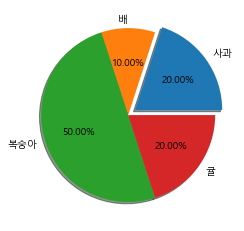

In [15]:
#파이차트는 비율을 계산한 다음에, 비율별로 쪼개는 놈이다.
#추가적인 옵션들을 잘 보자. 이런 디테일함이 매우 중요하다.

import matplotlib.pyplot as plt


label = ["사과","배","복숭아","귤"]
amount = [20,10,50,20]
plt.pie(amount,labels=label,
       autopct="%.2f%%"
       ,textprops={"fontsize":10} #fontsize를 줄여준다.
        ,explode=[0.1,0,0,0], #파이조각을 지정한 크기만큼 뽑아준다.
        shadow=True
       ) #형식을 유의하라.
plt.show()


## 4.2 파이차트 활용
- 한국 웹브라우저 점유율을 파이차트로 작성
    - https://www.koreahtml5.kr/front/stats/browser/browserUseStats.do

In [97]:
import pandas as pd
import matplotlib.pyplot as plt
pd.__version__

'1.4.3'

In [ ]:
pip install pandas --upgrade

In [17]:
pd.options.display.max_columns = 25


In [98]:
df=pd.read_excel("data/webbrowser_share.xls",converters={"date":str}) #특정 컬럼을 어떤 타입으로 읽을지 설정. 물론 생략하면 원래 문법대로 설정을 한다.
df.shape

(12, 22)

In [99]:
df.set_index('date', inplace=True)

In [100]:
df.index

Index(['2018.08', '2018.09', '2018.10', '2018.11', '2018.12', '2019.01',
       '2019.02', '2019.03', '2019.04', '2019.05', '2019.06', '2019.07'],
      dtype='object', name='date')

In [102]:
df.loc['2018.08']

Chrome              59.12
IE                  31.06
Edge                 2.97
Safari               2.52
Whale Browser        1.36
Firefox              1.26
Opera                0.88
Swing                0.39
Phantom              0.25
UC Browser           0.03
Chromium             0.03
QQ Browser           0.02
Vivaldi              0.02
360 Safe Browser     0.02
Maxthon              0.02
Coc Coc              0.00
Puffin               0.00
Yandex Browser       0.01
Sogou Explorer       0.01
Mozilla              0.00
Whale                0.00
Name: 2018.08, dtype: float64

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 12 entries, 2018.08 to 2019.07
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Chrome            12 non-null     float64
 1   IE                12 non-null     float64
 2   Edge              12 non-null     float64
 3   Safari            12 non-null     float64
 4   Whale Browser     12 non-null     float64
 5   Firefox           12 non-null     float64
 6   Opera             12 non-null     float64
 7   Swing             12 non-null     float64
 8   Phantom           12 non-null     float64
 9   UC Browser        12 non-null     float64
 10  Chromium          12 non-null     float64
 11  QQ Browser        12 non-null     float64
 12  Vivaldi           12 non-null     float64
 13  360 Safe Browser  12 non-null     float64
 14  Maxthon           12 non-null     float64
 15  Coc Coc           12 non-null     float64
 16  Puffin            12 non-null    

In [72]:
# df['date'].astype("str")

In [89]:
df.index

Float64Index([2018.08, 2018.09,  2018.1, 2018.11, 2018.12, 2019.01, 2019.02,
              2019.03, 2019.04, 2019.05, 2019.06, 2019.07],
             dtype='float64', name='date')

In [74]:
df.iloc[:,:6] #이런 식으로 슬라이싱을 한다는 것을 다시한번 기억해내자.

,Chrome,IE,Edge,Safari,Whale Browser,Firefox
date,,,,,,
2018.08,59.12,31.06,2.97,2.52,1.36,1.26
2018.09,61.95,27.84,3.16,2.19,1.27,2.57
2018.10,62.05,28.36,3.35,2.43,1.28,1.36
2018.11,65.31,26.29,3.06,2.09,1.16,1.10
2018.12,68.34,22.31,2.99,2.02,1.11,2.04
2019.01,70.46,21.05,2.99,2.07,1.14,1.15
2019.02,70.63,20.71,2.68,2.53,1.22,1.21
2019.03,63.35,25.42,3.81,3.16,1.65,1.49
2019.04,63.63,24.65,4.08,3.11,1.64,1.61


In [75]:
#점유율이 미미한 브라우저들은 묶어서 기타로 만들어준다.
cols = df.columns
web_df = df[cols[:6]].copy()
web_df.head()

,Chrome,IE,Edge,Safari,Whale Browser,Firefox
date,,,,,,
2018.08,59.12,31.06,2.97,2.52,1.36,1.26
2018.09,61.95,27.84,3.16,2.19,1.27,2.57
2018.10,62.05,28.36,3.35,2.43,1.28,1.36
2018.11,65.31,26.29,3.06,2.09,1.16,1.10
2018.12,68.34,22.31,2.99,2.02,1.11,2.04


In [76]:
web_df['etc']=df[cols[6:]].sum(axis=1)

In [77]:
web_df

,Chrome,IE,Edge,Safari,Whale Browser,Firefox,etc
date,,,,,,,
2018.08,59.12,31.06,2.97,2.52,1.36,1.26,1.68
2018.09,61.95,27.84,3.16,2.19,1.27,2.57,1.00
2018.10,62.05,28.36,3.35,2.43,1.28,1.36,1.14
2018.11,65.31,26.29,3.06,2.09,1.16,1.10,0.98
2018.12,68.34,22.31,2.99,2.02,1.11,2.04,1.17
2019.01,70.46,21.05,2.99,2.07,1.14,1.15,1.10
2019.02,70.63,20.71,2.68,2.53,1.22,1.21,1.00
2019.03,63.35,25.42,3.81,3.16,1.65,1.49,1.11
2019.04,63.63,24.65,4.08,3.11,1.64,1.61,1.27


In [78]:
#n 2018.08 점유율

plt.figure(figsize=(10,10))
plt.pie(web_df.loc['2018.08'],labels=web_df.columns,autopct='%.2f%%',textprops={"fontsize":10},
       pctdistance=0.7,labeldistance=1.1)#pctdistance:퍼센트 text의 거리를 구한다.
#labeldistance: 라벨 text의 위치. 숫자가 증가할 수록 중심에서 멀어지는 것이다.

plt.show()

KeyError: '2018.08'

<Figure size 720x720 with 0 Axes>

In [79]:
# 2018.08 점유율
#사실 그렇게까지중요한 것은 아닌데, 남들에게 보여줄 때 중요하니까~~
#label을 legend로 처리를 하자.
plt.figure(figsize=(7,7))


#wedge: 파이조각객체들을 제공
#texts: 라벨과 그 위치를 제공 ->text 객체
#autotext: 퍼센트 문자열들과 그 위치 -> text 객체
wedge,texts,autotexts=plt.pie(web_df.loc['2018.08'],autopct='%.2f%%',textprops={"fontsize":10},
       pctdistance=0.7,labeldistance=1.1)#pctdistance:퍼센트 text의 거리를 구한다.
#labeldistance: 라벨 text의 위치. 숫자가 증가할 수록 중심에서 멀어지는 것이다.



plt.legend(wedge,web_df.columns,bbox_to_anchor=(1,0.9),loc="upper left",title="웹브라우저",fontsize=10)
plt.show()

KeyError: '2018.08'

<Figure size 504x504 with 0 Axes>

# 5 히스토그램(Histogram) 그리기
## 5.1 히스토그램

- 도수 분포표를 그래프로 나타낸 것.
    - 도수분포표: 연속형 자료를 특정 구간(bin)으로 나눠 그 빈도를 나타낸 표
        - 빈도 확인이나 **분포**를 볼때 사용한다.
    - X축: 계급(변수구간)의 대표값, Y축: 빈도수
- `hist(data [, bins=계급개수)` 메소드를 사용
    - data: 리스트형의 객체를 전달한다.

In [3]:
#히스토그램은 연속된 자료형의 수량을 체크하기 위한 것이다.
#뭐... 복잡하게 설명을 듣는 것 보다는 직접 해 보는 것이 더 좋을 수 있다.


import pandas as pd
dia=pd.read_csv('data/diamonds.csv')
dia.info() #diamonds의 정보들을 다 모아서 보자.




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


<AxesSubplot:xlabel='price'>

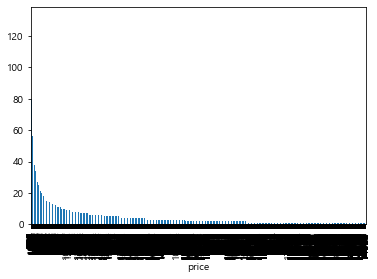

In [6]:
#가격,x등 여러가지 항목의 value_counts를 해보자.
#근데, 이렇게 그래프를 그리는 것은 겁나 오래 걸린다. 1만개 이상의 데이터를 손수 그리는 거거든.
dia['price'].value_counts().plot(kind='bar')


In [7]:
dia['price'].max()

18823

In [10]:
price_cate=pd.cut(dia['price'],bins=[300,5000,10000,20000],labels=['저가','중가','고가']) #bins를 통해 cut의 범위를 정한다.
price_cate

0        저가
1        저가
2        저가
3        저가
4        저가
         ..
53935    저가
53936    저가
53937    저가
53938    저가
53939    저가
Name: price, Length: 53940, dtype: category
Categories (3, object): ['저가' < '중가' < '고가']

In [13]:
cnt = price_cate.value_counts() #위처럼 카테고리를 나눈 다음, value_counts로 항목을 조회하면 쉽게 구할 수 있다.
#cnt와 도수분포표와 연관이 있다. 자세한 것은 아래에서 보자.
cnt

price
저가    39226
중가     9492
고가     5222
Name: count, dtype: int64

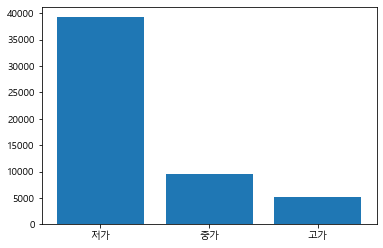

In [16]:
plt.bar(cnt.index,cnt) #도수 분포표를 시각화
plt.show()

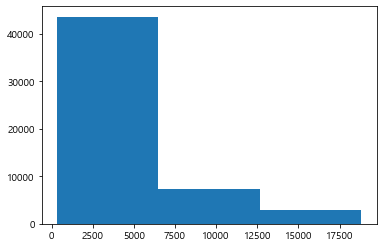

In [23]:
#히스토그램
plt.hist(dia['price'],bins=3) #히스토그램을 그릴 데이터셋: 연속형 값들을 넣어준다.
#bins는 몇분할인지를 따지는 것이다.
#범위를 기준으로 10분할을 한 다음(10분할이 default이다.) 개수를 count한다.
plt.show()

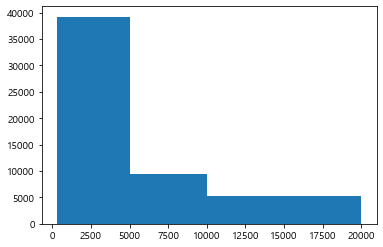

In [24]:
#히스토그램
plt.hist(dia['price'],bins=[300,5000,10000,20000]) #히스토그램을 그릴 데이터셋: 연속형 값들을 넣어준다.
#bins는 몇분할인지를 따지는 것이다. 안에 숫자 범위를 넣어주면, 그 범위에 따라 그래프를 그린다.
#범위를 기준으로 10분할을 한 다음(10분할이 default이다.) 개수를 count한다.
plt.show()

## 5.2 히스토그램 활용
- tips.csv
    - 식당에서 팁을 지불한 손님의 정보를 모아둔 데이터 셋    

In [25]:
tips = pd.read_csv('data/tips.csv')

In [26]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [27]:
tips['sex'].value_counts()

sex
Male      157
Female     87
Name: count, dtype: int64

In [29]:
tips['smoker'].value_counts()

smoker
No     151
Yes     93
Name: count, dtype: int64

In [31]:
tips['size'].value_counts()

size
2    156
3     38
4     37
5      5
1      4
6      4
Name: count, dtype: int64

In [32]:
tips['total_bill'].value_counts()
tips['tip'].value_counts()

tip
2.00    33
3.00    23
4.00    12
5.00    10
2.50    10
        ..
4.34     1
1.56     1
5.20     1
2.60     1
1.75     1
Name: count, Length: 123, dtype: int64

### total_bill 의 분포를 시각화

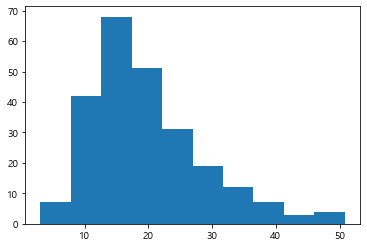

In [33]:
plt.hist(tips['total_bill'])

plt.show()

#이렇게 하긴 했는데, 세분화를 하고 싶다. 그러면 bins를 건든다.

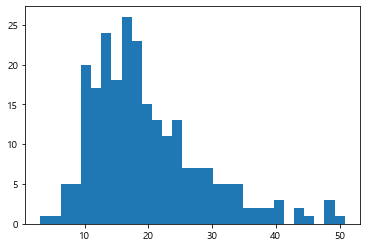

In [34]:
plt.hist(tips['total_bill'],bins=30)

plt.show()

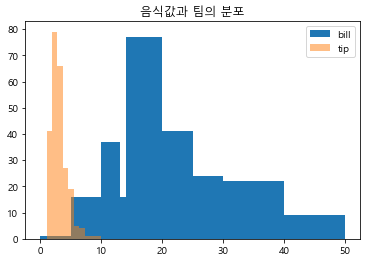

In [42]:
#위의 그래프를 보고, bins를 이렇게 조작할 수 있다.
plt.hist(tips['total_bill'],bins=[0,5,10,13,14,20,25,30,40,50],label="bill")


#tip의 분포-----hist를 복수로 정의를 해도, 결과는 잘 나온다.

plt.hist(tips['tip'],alpha=0.5,label='tip') #alpha를 통해 투명도를 준다.

plt.legend()
plt.title("음식값과 팀의 분포")
plt.show()

# 6. 상자그래프(Boxplot) 그리기
## 6.1 상자그래프란
- 연속형 값들의 사분위수, 극단값들을 이용해 값들의 분포를 시각화한다.
- boxplot(x, whis=1.5)
    - x: 데이터셋
    - whis: 극단치 계산시 사용할 값(기본 1.5)
        - IQR을 이용해 극단치 계산하기
            - IQR(Inter Quatile Range): $3분위수 - 1분위수$ 로 중간 50%값의 범위
            - 극단적으로 작은값: 1분위 - $IQR(3분위수-1분위수) * whis$   보다 작은 값들
            - 극단적으로 큰값: 3분위 + $IQR(3분위수-1분위수) * whis$  보다 큰 값들

In [46]:
import numpy as np
data = np.random.randint(1,100,1000) #1부터 100까지 1000개를 만들었다. 
data[:5] = [200,250,-50,-100,-60]
data[:10] #1번부터 5번까지 데이터를 바꾸었고, 나머지 5개는 바꾸지 않음.

array([ 200,  250,  -50, -100,  -60,   58,   92,   64,   24,   60])

In [48]:
#사분위수

pd.Series(data).quantile(q=[0.25,0.5,0.75])
#각 분위에 어떤 숫자가 들어갔는지 잘 파악하자.

0.25    27.0
0.50    52.5
0.75    75.0
dtype: float64

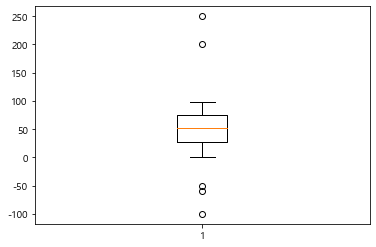

In [52]:
plt.boxplot(data)
plt.show()


#데이터들의 의미
#네모에서 윗부분이 3분위값이고, 중앙부분이 중앙값이고, 밑의 부분이 1분위값이다.
#네모에서 위의 선은 정상범위의 최대값이고, 밑의 선은 정상범위의 최소값이다.
#밖의 동그라미들은 정상범위 밖의 값이다.

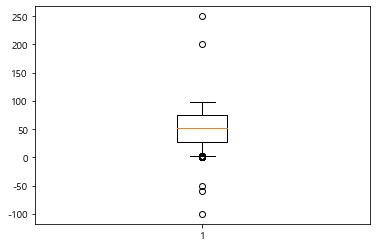

In [54]:
#정상범위를 더 좁게.

plt.boxplot(data,whis=0.5)
plt.show()

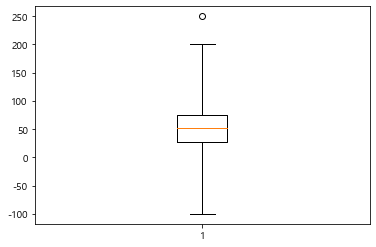

In [56]:
#정상범위를 더 넓게.
#위의 설명 부분에 있는 whis의 숫자를 1 이상으로 늘린다.
plt.boxplot(data,whis=3)
plt.show()

## 상자그래프 활용
- tips_df 에서 tip의 분포를 상자그래프로 확인

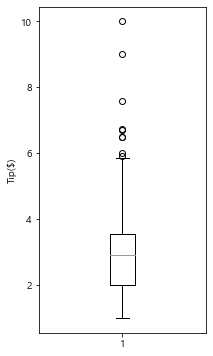

In [58]:
#tip의 분포->boxplot(값의 범위를 기준으로 시각화를 한다.)


plt.figure(figsize=(3,6))
plt.boxplot(tips['tip'])
plt.ylabel("Tip($)")
plt.show()

- 남녀별 tip의 분포를 하나의 boxplot에서 그려 비교
- 한 그래프에서 여러 데이터셋의 boxplot을 그리기.
    - 2차원 배열형태의 구조로로 데이터를 제공
    - 행(axis=0) 별로 그래프를 그린다.

In [60]:
#남녀별 tip을 분리

m_tip = tips.loc[tips['sex']=='Male','tip']
m_tip

1      1.66
2      3.50
3      3.31
5      4.71
6      2.00
       ... 
236    1.00
237    1.17
239    5.92
241    2.00
242    1.75
Name: tip, Length: 157, dtype: float64

In [62]:
f_tip = tips.query("sex== 'Female'")["tip"]
f_tip

0      1.01
4      3.61
11     5.00
14     3.02
16     1.67
       ... 
226    2.00
229    2.88
238    4.67
240    2.00
243    3.00
Name: tip, Length: 87, dtype: float64

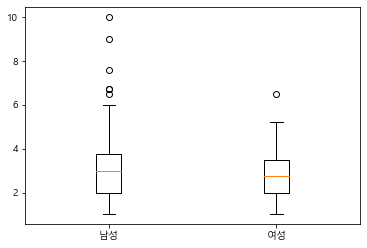

In [64]:
#하나의 boxplot에 두개 이상의 데이터를 그릴 경우 리스트로 묶어서 제공한다.
#boxplot의 구조를 잘 파악하도록 하자.
plt.boxplot([m_tip,f_tip],labels=["남성","여성"])


plt.show()